<a href="https://colab.research.google.com/github/jeremychia/Topic-Analysis-of-Singapore-s-2022-Budget-Debates/blob/main/Assignment_4_NLP_Text_Analysis_of_the_2022_Singapore_Budget_and_Debates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [113]:
!pip install pyLDAvis
!pip install gensim

In [114]:
import re
import spacy

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Importing Gensim
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

# Import Wordcloud
from wordcloud import WordCloud, STOPWORDS

In [115]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Loading Data

In [149]:
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Singapore Budget 2022.csv']),encoding='latin-1')

Saving Singapore Budget 2022.csv to Singapore Budget 2022 (2).csv


In [171]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))

In [172]:
df.head()

,ï»¿Order,Member,GRC,Date,Speech,Topic,Probability
0,1,Lawrence Wong,Marsiling-Yew Tee,2022-02-18,"Mr Deputy Speaker, Sir, I beg to move, ""That P...",22,0.848970
1,2,Lawrence Wong,Marsiling-Yew Tee,2022-02-18,"Sir, it has been more than two years since COV...",0,0.559096
2,3,Lawrence Wong,Marsiling-Yew Tee,2022-02-18,"During this period, we mounted multiple public...",13,0.384913
3,4,Lawrence Wong,Marsiling-Yew Tee,2022-02-18,"Throughout these challenges, Singaporeans have...",8,0.733885
4,5,Lawrence Wong,Marsiling-Yew Tee,2022-02-18,"Most of all, I thank all Singaporeans for your...",39,0.867890


In [173]:
len(df)

2684

# Text Pre-processing

Steps to preprocess text data:

1. Convert the text into lowercase
2. Split text into words
3. Remove the stop loss words
4. Remove the Punctuation, any symbols and special characters
5. Normalize the word using lemmization

In [240]:
corpus = df['Speech']

In [302]:
# Apply Preprocessing on the Corpus

# stop loss words 
stop = stopwords.words('english')

stop.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say',\
                   'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done',\
                   'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',\
                   'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run',\
                   'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take',\
                   'come','u','may','m','mr','â','speaker','deputy','budget', 'singapore',\
                   'please'])

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalised

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus]   

## Comparison of the first speech before and after pre-processing.

In [303]:
df['Speech'].iloc[0]

'Mr Deputy Speaker, Sir, I beg to move, "That Parliament approves the financial policy of the Government for the financial year 1 April 2022 to 31 March 2023."'

In [304]:
clean_corpus[0:1]

[['speaker',
  'sir',
  'beg',
  'move',
  'that',
  'parliament',
  'approves',
  'financial',
  'policy',
  'government',
  'financial',
  'year',
  '1',
  'april',
  '2022',
  '31',
  'march',
  '2023']]

# Creating a Document Term Matrix

In [305]:
# every unique term is assigned an index. 
dict_ = corpora.Dictionary(clean_corpus)
print(dict_)

Dictionary(10216 unique tokens: ['1', '2022', '2023', '31', 'approves']...)


In [306]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]

# Implementing LDA

In [307]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [308]:
# Computing the most optimal number of topics
no_of_topics = []
perplexity = []
coherence_score = []

for i in range(1,21):
  ldamodel = Lda(doc_term_matrix, num_topics=i, id2word = dict_, passes=1, random_state=0, eval_every=None)
  no_of_topics.append(i)
  perplexity.append(ldamodel.log_perplexity(doc_term_matrix))
  
  coherence_model_lda = CoherenceModel(model=ldamodel, texts=clean_corpus, dictionary=dict_, coherence='c_v')
  coherence_score.append(coherence_model_lda.get_coherence())

In [309]:
print(no_of_topics)
print(perplexity)
print(coherence_score)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[-8.161623959892067, -8.256727720053028, -8.336812086519306, -8.407838018801108, -8.470749143709225, -8.530475964976382, -8.575253699721374, -8.631473522836806, -8.676898997626852, -8.723843270560513, -8.767529280599193, -8.805432669743752, -8.848352508546455, -8.885139389447808, -8.932888253677676, -8.961617152154382, -9.007659283255999, -9.04715651552403, -9.074767051506077, -9.111728682110222]
[0.2031337344986574, 0.2482512780710345, 0.30349652698154483, 0.315637770103635, 0.3358855990015515, 0.34368500994833684, 0.37063716965042337, 0.3471108972850576, 0.3393657262009952, 0.3655701319729332, 0.33246415715459204, 0.356973978646041, 0.33074922902564424, 0.3401773200166118, 0.33312853371462164, 0.3295389989019606, 0.3097023766953922, 0.32451951238404286, 0.3257056192328232, 0.3296417226220095]


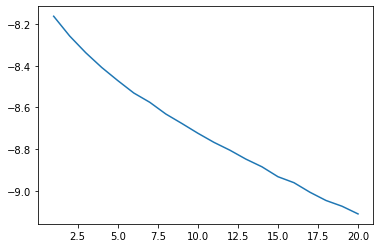

In [310]:
plt.plot(no_of_topics,perplexity)
plt.show()

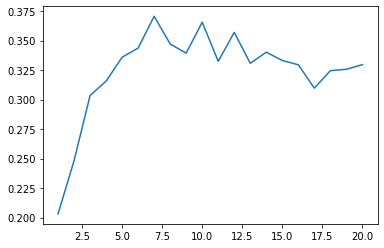

In [311]:
plt.plot(no_of_topics,coherence_score)
plt.show()

In [312]:
best_topics = no_of_topics[coherence_score.index(np.max(coherence_score))]
print("Best number of topics:",best_topics)

Best number of topics: 7


In [313]:
# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=best_topics, id2word = dict_, passes=1, random_state=0, eval_every=None)

In [314]:
print(ldamodel.print_topics(num_topics=best_topics, num_words=5))

# num_topics mean: how many topics want to extract 
# num_words: the number of words that want per topic

[(0, '0.013*"worker" + 0.010*"support" + 0.010*"social" + 0.007*"help" + 0.007*"government"'), (1, '0.011*"worker" + 0.008*"new" + 0.007*"work" + 0.007*"social" + 0.005*"youth"'), (2, '0.013*"gst" + 0.010*"support" + 0.007*"increase" + 0.007*"government" + 0.007*"scheme"'), (3, '0.010*"year" + 0.008*"worker" + 0.006*"help" + 0.006*"government" + 0.005*"income"'), (4, '0.008*"social" + 0.007*"support" + 0.005*"work" + 0.005*"worker" + 0.005*"gst"'), (5, '0.011*"year" + 0.008*"increase" + 0.007*"cost" + 0.007*"singaporean" + 0.006*"tax"'), (6, '0.021*"tax" + 0.010*"government" + 0.006*"revenue" + 0.005*"income" + 0.005*"cost"')]


In [315]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=clean_corpus, dictionary=dict_, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.575253699721374

Coherence Score:  0.37063716965042337


# Visualising Topics

In [316]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] * 3
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say',\
                   'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done',\
                   'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',\
                   'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run',\
                   'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take',\
                   'come','u','may','m','mr','â','speaker','deputy'])

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

In [317]:
topics = ldamodel.show_topics(num_topics=best_topics,formatted=False)

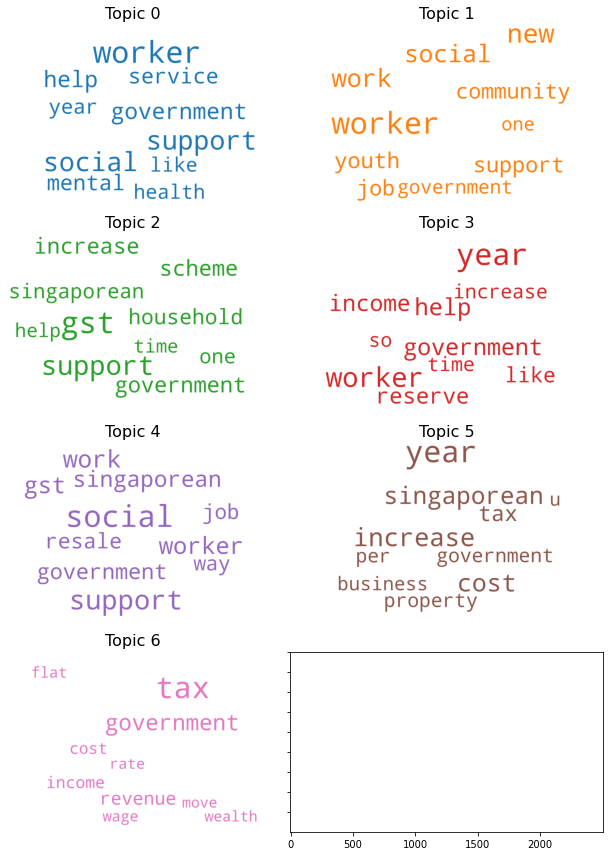

In [318]:
fig, axes = plt.subplots(4, 2, figsize=(9,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 7:
      break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

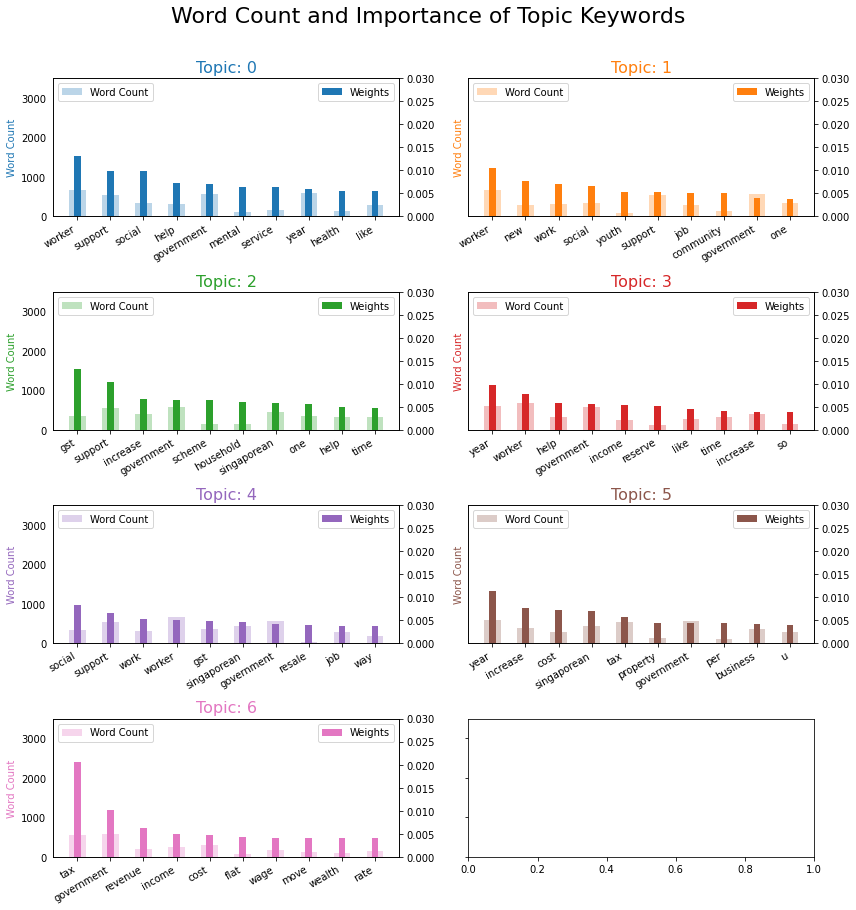

In [319]:
from collections import Counter
data_flat = [w for w_list in clean_corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_out = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 2, figsize=(12,12), sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 7:
      break
    ax.bar(x='word', height="word_count", data= df_out.loc[ df_out.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data= df_out.loc[ df_out.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels( df_out.loc[ df_out.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [320]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary=ldamodel.id2word)

In [321]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.004774 -0.033964       1        1  20.970951
0      0.058186 -0.013759       2        1  16.068902
1      0.088294 -0.012397       3        1  15.752619
5     -0.028250 -0.060688       4        1  12.844651
6     -0.081607  0.031385       5        1  12.723694
2     -0.054707 -0.006908       6        1  12.379091
4      0.022859  0.096330       7        1   9.260092, topic_info=           Term        Freq       Total Category  logprob  loglift
734         tax  417.000000  417.000000  Default  30.0000  30.0000
442         gst  319.000000  319.000000  Default  29.0000  29.0000
73       social  424.000000  424.000000  Default  28.0000  28.0000
94      support  480.000000  480.000000  Default  27.0000  27.0000
2150   property  123.000000  123.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
2538     speech   17.599296  103.757193   Topic7  -6.0781   0.6053
80         well   20.080811  187.609914   Topic7  -5.9462   0.1449
851   community   18.734211  168.774108   Topic7  -6.0156   0.1812
421        need   18.135421  204.215201   Topic7  -6.0481  -0.0419
83          â   18.038732  205.972954   Topic7  -6.0534  -0.0558

[594 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.068883    1
0         2  0.160728    1
0         3  0.022961    1
0         4  0.229611    1
0         5  0.413299    1
...     ...       ...  ...
83        3  0.189345  â
83        4  0.140795  â
83        5  0.072825  â
83        6  0.160215  â
83        7  0.087390  â

[1542 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 6, 7, 3, 5])

## Assigning Topics to the Documents

In [322]:
def max_prob_topic(list_of_topics):
  topic = []
  probability = []
  for tpl in list_of_topics:
    topic.append(tpl[0])
    probability.append(tpl[1])
  return [topic[probability.index(np.max(probability))],np.max(probability)]
  

In [323]:
count = 0
topic = []
probability = []
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    topic.append(max_prob_topic(i)[0])
    probability.append(max_prob_topic(i)[1])
    count += 1

doc :  0 [(0, 0.7576378), (5, 0.20462443)]
doc :  1 [(0, 0.017939415), (1, 0.44030213), (2, 0.017904362), (3, 0.017957201), (4, 0.017890472), (5, 0.47011375), (6, 0.017892672)]
doc :  2 [(1, 0.23013495), (4, 0.7487617)]
doc :  3 [(0, 0.97674704)]
doc :  4 [(3, 0.95218647)]
doc :  5 [(1, 0.3393091), (3, 0.6295159)]
doc :  6 [(0, 0.93853503), (1, 0.010251904), (2, 0.010218225), (3, 0.010259526), (4, 0.010241365), (5, 0.010266344), (6, 0.010227626)]
doc :  7 [(3, 0.30395445), (6, 0.6482052)]
doc :  8 [(1, 0.9494233)]
doc :  9 [(0, 0.011929993), (1, 0.011932908), (2, 0.01192024), (3, 0.82251537), (4, 0.011926012), (5, 0.11785194), (6, 0.011923591)]
doc :  10 [(0, 0.4018321), (4, 0.12614186), (5, 0.45730552)]
doc :  11 [(0, 0.035726223), (1, 0.03573843), (2, 0.7855165), (3, 0.035741754), (4, 0.035779938), (5, 0.035754755), (6, 0.035742376)]
doc :  12 [(3, 0.2801573), (5, 0.6886975)]
doc :  13 [(0, 0.028649788), (1, 0.028593274), (2, 0.028725939), (3, 0.82799345), (4, 0.028679937), (5, 0.028

In [324]:
df['Topic'] = topic
df['Probability'] = probability
df

,ï»¿Order,Member,GRC,Date,Speech,Topic,Probability
0,1,Lawrence Wong,Marsiling-Yew Tee,2022-02-18,"Mr Deputy Speaker, Sir, I beg to move, ""That P...",0,0.757638
1,2,Lawrence Wong,Marsiling-Yew Tee,2022-02-18,"Sir, it has been more than two years since COV...",5,0.470114
2,3,Lawrence Wong,Marsiling-Yew Tee,2022-02-18,"During this period, we mounted multiple public...",4,0.748762
3,4,Lawrence Wong,Marsiling-Yew Tee,2022-02-18,"Throughout these challenges, Singaporeans have...",0,0.976747
4,5,Lawrence Wong,Marsiling-Yew Tee,2022-02-18,"Most of all, I thank all Singaporeans for your...",3,0.952186
...,...,...,...,...,...,...,...
2679,2680,Pritam Singh,Aljunied,2022-02-03,"A number of other points, like I said, I will ...",3,0.632849
2680,2681,Pritam Singh,Aljunied,2022-02-03,And we have really made the Government's own a...,3,0.440388
2681,2682,Pritam Singh,Aljunied,2022-02-03,"So, clearly, the other numbers that were in hi...",3,0.946289
2682,2683,Pritam Singh,Aljunied,2022-02-03,Let me just then come to the point before I ha...,3,0.969331


# Exploring Topic by Member

In [359]:
top_10_contributors = df[["Member","Speech"]].groupby("Member",as_index=False).count().sort_values("Speech",ascending=False)[0:10]
print(top_10_contributors)

                            Member  Speech
30                   Lawrence Wong     541
46                    Pritam Singh      83
17                     Foo Mee Har      72
31                     Leon Perera      62
3                    Chee Hong Tat      62
55                    Tan See Leng      60
40  Muhamad Faisal Bin Abdul Manap      57
59                    Xie Yao Quan      54
26          Jessica Tan Soon NeoÂ       53
35              Louis Ng Kok Kwang      52


In [361]:
top_10_contributors.iloc[0]["Member"]

'Lawrence Wong'

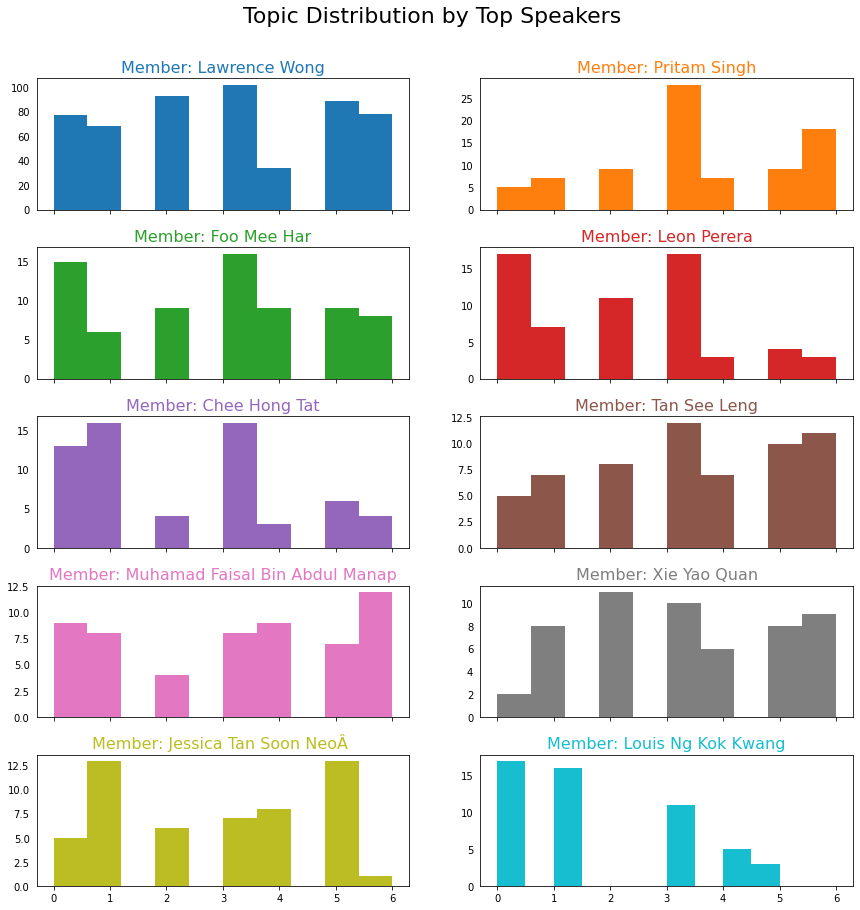

In [368]:
fig, axes = plt.subplots(5, 2, figsize=(12,12), sharey=False,sharex=True)

for i, ax in enumerate(axes.flatten()):
      ax.hist(df[df["Member"]==top_10_contributors.iloc[i]["Member"]]["Topic"], color=cols[i])
      ax.set_title('Member: ' + top_10_contributors.iloc[i]["Member"], color=cols[i], fontsize=16)
      ax.tick_params(axis='y', left=False)

fig.tight_layout(w_pad=2)    
fig.suptitle('Topic Distribution by Top Speakers', fontsize=22, y=1.05)    
plt.show()

In [328]:
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

# Analysing Bigrams

In [329]:
pip install networkx

In [330]:
from nltk import bigrams
import itertools
import collections
import networkx as nx

In [331]:
terms_bigram = [list(bigrams(word)) for word in clean_corpus]

In [332]:
terms_bigram[0]

[('speaker', 'sir'),
 ('sir', 'beg'),
 ('beg', 'move'),
 ('move', 'that'),
 ('that', 'parliament'),
 ('parliament', 'approves'),
 ('approves', 'financial'),
 ('financial', 'policy'),
 ('policy', 'government'),
 ('government', 'financial'),
 ('financial', 'year'),
 ('year', '1'),
 ('1', 'april'),
 ('april', '2022'),
 ('2022', '31'),
 ('31', 'march'),
 ('march', '2023')]

In [333]:
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(20)



[(('mental', 'health'), 85),
 (('cost', 'living'), 77),
 (('social', 'worker'), 76),
 (('last', 'year'), 71),
 (('speaker', 'sir'), 69),
 (('social', 'compact'), 67),
 (('carbon', 'tax'), 67),
 (('tax', 'rate'), 61),
 (('income', 'tax'), 58),
 (('property', 'tax'), 54),
 (('worker', 'party'), 51),
 (('gst', 'hike'), 50),
 (('progressive', 'wage'), 46),
 (('gst', 'increase'), 46),
 (('two', 'year'), 44),
 (('finance', 'minister'), 42),
 (('five', 'year'), 40),
 (('support', 'budget'), 40),
 (('lowerwage', 'worker'), 39),
 (('wealth', 'tax'), 39)]

In [334]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25),
                             columns=['bigram', 'count'])

bigram_df.head()

,bigram,count
0,"(mental, health)",85
1,"(cost, living)",77
2,"(social, worker)",76
3,"(last, year)",71
4,"(speaker, sir)",69


In [335]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("singapore", weight=100)

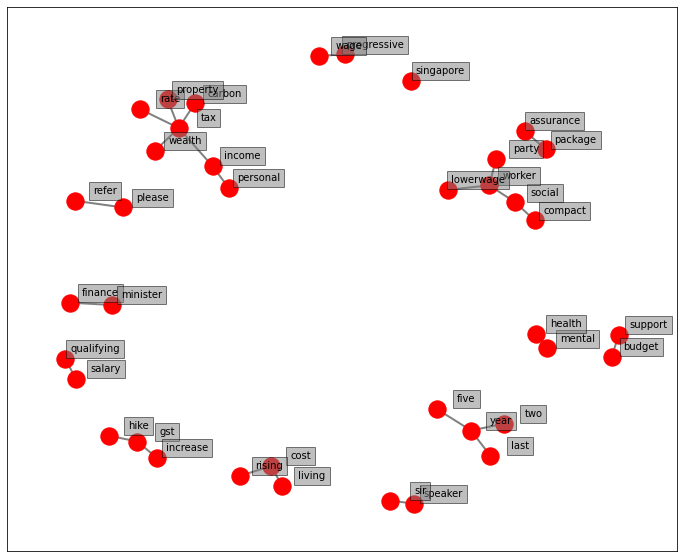

In [370]:
fig, ax = plt.subplots(figsize=(12, 10))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=2,
                 edge_color='grey',
                 node_color='red',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.10, value[1]+.03
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.5),
            horizontalalignment='center', fontsize=10)
    
plt.show()
